In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("soil_measures.csv")

In [3]:
data

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
...,...,...,...,...,...
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee


In [4]:
data.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [6]:
data["crop"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
# data = data[data['crop'] == ['rice','coffee']]
data = data[data['crop'].isin(['rice', 'coffee'])]


In [8]:
data

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
...,...,...,...,...,...
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee


In [9]:
data['crop'].unique()

array(['rice', 'coffee'], dtype=object)

In [10]:
data.columns

Index(['N', 'P', 'K', 'ph', 'crop'], dtype='object')

In [37]:
X = data[['N', 'P', 'K', 'ph']]

In [38]:
y = data['crop']

In [39]:
data['crop'] = data['crop'].map({'rice': 0 ,'coffee':1})

C:\Users\Dazzlingpc\AppData\Local\Temp\ipykernel_15156\2022187940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['crop'] = data['crop'].map({'rice': 0 ,'coffee':1})


In [40]:
data

,N,P,K,ph,crop
0,90,42,43,6.502985,NaN
1,85,58,41,7.038096,NaN
2,60,55,44,7.840207,NaN
3,74,35,40,6.980401,NaN
4,78,42,42,7.628473,NaN
...,...,...,...,...,...
2195,107,34,32,6.780064,NaN
2196,99,15,27,6.086922,NaN
2197,118,33,30,6.362608,NaN
2198,117,32,34,6.758793,NaN


In [41]:
X

,N,P,K,ph
0,90,42,43,6.502985
1,85,58,41,7.038096
2,60,55,44,7.840207
3,74,35,40,6.980401
4,78,42,42,7.628473
...,...,...,...,...
2195,107,34,32,6.780064
2196,99,15,27,6.086922
2197,118,33,30,6.362608
2198,117,32,34,6.758793


In [42]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2195    1
2196    1
2197    1
2198    1
2199    1
Name: crop, Length: 200, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split


In [44]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
classfier = LogisticRegression()

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {'penalty':['l2','l1','elasticnet'],'C':[1,2,3,4,5,6],'max_iter':[100,200,300,400,500]}

In [49]:
data1 = GridSearchCV(classfier,parameters,scoring='accuracy',cv = 5)

In [50]:
data1.fit(X_train,y_train)

F:\Data science\test_venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Data science\test_venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Data science\test_venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\Data science\test_venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [51]:
data1.best_estimator_

LogisticRegression(C=1)

In [52]:
data1.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [53]:
data1.best_score_

np.float64(0.9923076923076923)

In [68]:
y_pri = data1.predict([[	90	,42,	43,	6.502985]])

F:\Data science\test_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
y_pri

array([0])

In [56]:
from sklearn.metrics import accuracy_score,classification_report

In [57]:
clr_report = classification_report(y_pri,y_test)

In [58]:
clr_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        35\n           1       1.00      1.00      1.00        31\n\n    accuracy                           1.00        66\n   macro avg       1.00      1.00      1.00        66\nweighted avg       1.00      1.00      1.00        66\n'

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
cm = confusion_matrix(y_pri,y_test)

In [63]:
cm

array([[35,  0],
       [ 0, 31]])

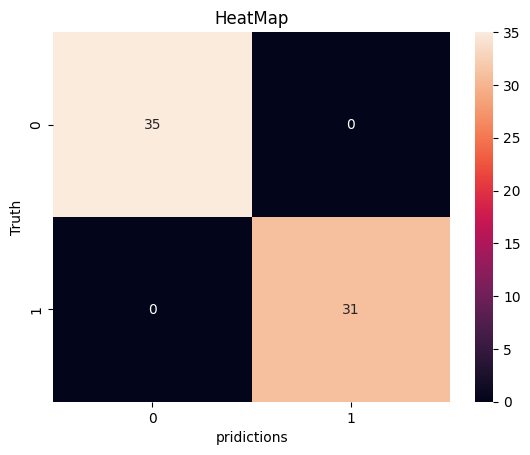

In [67]:
sns.heatmap(cm,annot=True)
plt.xlabel('pridictions')
plt.ylabel('Truth')
plt.title("HeatMap")
plt.show()

In [ ]:
y_pri
